In [1]:
import os,json
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import numpy as np
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)


In [2]:
### load files from all folders
def list_dirs(dir):                                                                                                  
    r = []                                                                                                            
    subdirs = [x[0] for x in os.walk(dir)]                                                                            
    for subdir in subdirs:                                                                                            
        files = os.walk(subdir).next()[2]                                                                             
        if (len(files) > 1):                                                                                          
            for file in files:                                                                                        
                r.append(subdir + '/'+ file)                                                                         
    return r 
path_comments = list_dirs('weibo/comments/')
path_reposts = list_dirs('weibo/reposts/')
path_statuses = list_dirs('weibo/statuses/')
comment_files = [pos_json for pos_json in path_comments if pos_json.endswith('.json')]
reposts_files = [pos_json for pos_json in path_reposts if pos_json.endswith('.json')]
statuses_files = [pos_json for pos_json in path_statuses if pos_json.endswith('.json')]



def make_df(from_files):
    df = pd.DataFrame(columns = ['id','gender', 'time','location', 'text'])
    for index, json_file in enumerate(from_files):
        json_data = open(json_file)
        text = json.load(json_data)
        user_id = text['user']['id']
        user_gender = text['user']['gender']
        time = parse(text['created_at'])
        if text['user']['location'][0:2] == u'\u6d77\u5916':
            user_loc = text['user']['location'][3:]
        else:    
            user_loc = text['user']['location'][0:2]
        try:
            user_text = text['retweeted_status']['text']
        except:    
            user_text = text['text']
        df.loc[index] = [user_id, user_gender, time, user_loc, user_text]
    return df

print len(comment_files),len(reposts_files),len(statuses_files)


8903 5253 9947


In [3]:
### create dataframes and combine for analysis

df_comments = make_df(comment_files)
df_reposts = make_df(reposts_files)
df_statuses = make_df(statuses_files)

df_comments['type'],df_reposts['type'],df_statuses['type'] = 'comment','repost','statuse'

df = df_comments.append([df_reposts,df_statuses])

In [4]:

df.text.str.lower().str.contains('katespades').sum()

1

In [5]:
df_mk,df_ks = df[df.text.str.lower().str.contains('michael kors|michaelkors|micheal kors|michealkors|mk')],df[df.text.str.lower().str.contains('kate spade|katespade|kate spades|katespades|ks')]



In [6]:
### total number of posts and unique users mentioning Michael Kors
print 'There are', len(df_mk) , 'posts and' , df_mk['id'].nunique() , 'users mentioning Michael Kors'

There are 7529 posts and 4272 users mentioning Michael Kors


In [7]:
### total number of posts and unique users mentioning Kate Spade
print 'There are', len(df_ks) , 'posts and' , df_ks['id'].nunique() , 'users mentioning Kate Spade'

There are 8120 posts and 4277 users mentioning Kate Spade


In [8]:
### top 10 users for total posts
df.groupby('id').size().nlargest(10)

id
3217535201    591
2187298830    271
3956831443    188
5689266274    155
5671523257    146
3737544502    143
1161106650    112
3481576475     98
5319321035     88
1811061014     79
dtype: int64

In [9]:
### top 10 locations for total posts
df[df.location!=''].groupby('location').size().nlargest(10)

location
美国    4439
其他    2634
广东    2180
上海    1761
北京    1681
浙江    1254
江苏    1109
四川     936
湖北     586
香港     573
dtype: int64

In [10]:
### top 10 users with Michael Kors mentions
df_mk.groupby('id').size().nlargest(10)

id
5671523257    145
5689266274    144
3737544502    123
3956831443    107
2417793200     70
2179810147     50
2204576563     46
3764313851     41
3219312864     40
5389076341     40
dtype: int64

In [11]:
### top 10 locations with Michael Kors mentions
df_mk[df_mk.location!=''].groupby('location').size().nlargest(10)

location
美国    1337
其他     823
广东     682
北京     535
上海     483
香港     427
江苏     342
四川     291
浙江     266
湖北     133
dtype: int64

In [12]:
### top 10 users with Kate Spade mentions
df_ks.groupby('id').size().nlargest(10)

id
2187298830    180
3481576475     56
3956831443     54
2879168864     37
2263431535     36
1649283513     34
2964030550     34
3284734883     34
2153953131     31
3127915453     29
dtype: int64

In [13]:
### top 10 locations with Kate Spade mentions
df_ks[df_ks.location!=''].groupby('location').size().nlargest(10)

location
美国    2077
其他     814
广东     757
上海     611
北京     536
浙江     443
江苏     326
四川     229
湖北     181
山东     171
dtype: int64

In [14]:
### create time series data frames
df_mk.index, df_ks.index = df_mk['time'], df_ks['time']
df_mk['date'], df_mk['hour'], df_mk['brand'] = df_mk.index.date, df_mk.index.hour, 'Michael Kors'
df_ks['date'], df_ks['hour'], df_ks['brand'] = df_ks.index.date, df_ks.index.hour, 'Kate Spade'

/Users/danti/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/danti/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
### top mention date for each brand
print df_mk.groupby('date').size().nlargest(1), df_ks.groupby('date').size().nlargest(1)

date
2015-10-16    423
dtype: int64 date
2015-09-04    519
dtype: int64


In [16]:
df_mk_type,df_ks_type = df_mk[df_mk['type']!= 'statuse'], df_ks[df_ks['type']!= 'statuse']

df_ts_alltype, df_ts = df_mk.append(df_ks), df_mk_type.append(df_ks_type)


In [17]:
### peak hour for total post
df_ts_alltype.groupby('hour').size().nlargest(1)

hour
2    1138
dtype: int64

In [18]:
### peak hour for each brand
print df_mk.groupby('hour').size().nlargest(1), df_ks.groupby('hour').size().nlargest(1)

hour
5    607
dtype: int64 hour
2    637
dtype: int64


In [19]:
### popular words associated with Michael Kors
words_mk = u''
for word in df_mk['text'].str.lower():
    words_mk = words_mk + word
    
top_word_mk = jieba.analyse.extract_tags(words_mk, topK=20, withWeight=False, allowPOS=())
pd.DataFrame(top_word_mk).T

Building prefix dict from /Users/danti/anaconda/lib/python2.7/site-packages/jieba/dict.txt ...
DEBUG:jieba:Building prefix dict from /Users/danti/anaconda/lib/python2.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/9h/9kk5bfks339ghcw0tmsx83180000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/9h/9kk5bfks339ghcw0tmsx83180000gn/T/jieba.cache
Loading model cost 0.465 seconds.
DEBUG:jieba:Loading model cost 0.465 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,kors,michael,mk,cn,http,慈善,饥饿,michaelkors,代购,直邮,刘雯,watchhungerstop,2015,遭受,正品,世界,50,##,粮食,餐食


In [20]:
### popular words associated with Kate Spade
words_ks = u''
for word in df_ks['text'].str.lower():
    words_ks = words_ks + word
    
top_word_ks = jieba.analyse.extract_tags(words_ks, topK=20, withWeight=False, allowPOS=())
pd.DataFrame(top_word_ks).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,spade,kate,cn,http,new,直邮,york,到手,包包,折扣,代购,钱包,2015,holiday,视频,特价,转发,美国,kloss,karlie


In [21]:
### Michael Kors related comments and reposts count per day 
ts_count_mk = df_mk_type.groupby(['date','type'])['text'].count()
ts_count_mk.to_csv('daily_count_mk.csv')
ts_count_mk.head(10)

date        type   
2015-08-29  comment      4
            repost      13
2015-08-30  comment      1
            repost       6
2015-08-31  repost      40
2015-09-01  repost     106
2015-09-02  comment      4
            repost     185
2015-09-03  comment      2
            repost      15
Name: text, dtype: int64

In [22]:
### Kate Spade related comments and reposts count per day 
ts_count_ks = df_ks_type.groupby(['date','type'])['text'].count()
ts_count_ks.to_csv('daily_count_ks.csv')
ts_count_ks.head(10)

date        type   
2015-08-31  comment      1
            repost       9
2015-09-01  repost      44
2015-09-02  repost      39
2015-09-03  comment      1
            repost      58
2015-09-04  comment      4
            repost      83
2015-09-05  comment     11
            repost     198
Name: text, dtype: int64

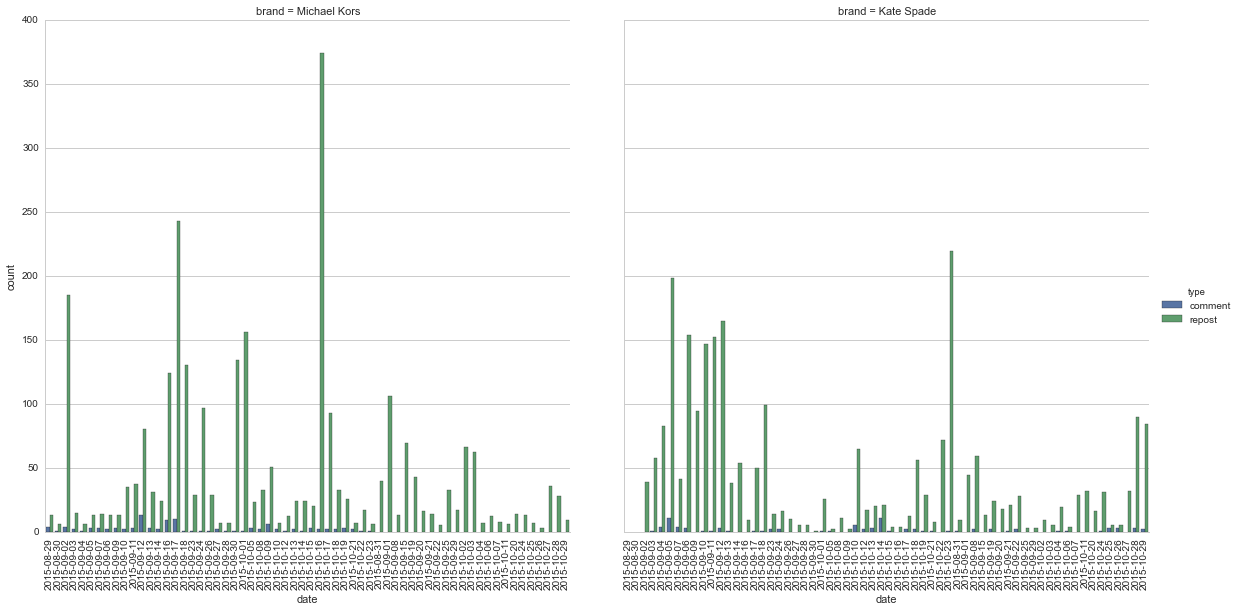

In [23]:
### plot total converstation for each brand over the entire time frame
g = sns.factorplot(x = 'date', hue = 'type', col = 'brand', data =df_ts, size = 8, kind = 'count')
g.set_xticklabels(df_ts.date.unique(),rotation = 90)

In [26]:
### explore user bias -- gender
df.groupby('gender')['id'].nunique()

gender
f    11281
m     1821
Name: id, dtype: int64

In [28]:
daily_posts = df_ts['text'].groupby([df_ts.date,df_ts.gender]).size().unstack()
daily_posts.head()

gender,f,m
date,,
2015-08-29,16,1
2015-08-30,6,1
2015-08-31,28,22
2015-09-01,84,66
2015-09-02,166,62


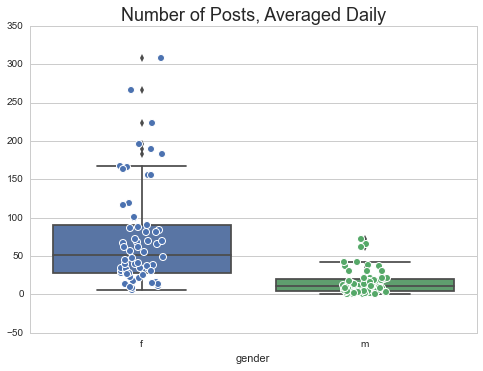

In [29]:
### female users are much more active in terms of posting than male users
plt.title('Number of Posts, Averaged Daily', fontsize = 18)
sns.boxplot(data = daily_posts)
sns.stripplot(data = daily_posts,jitter=True)

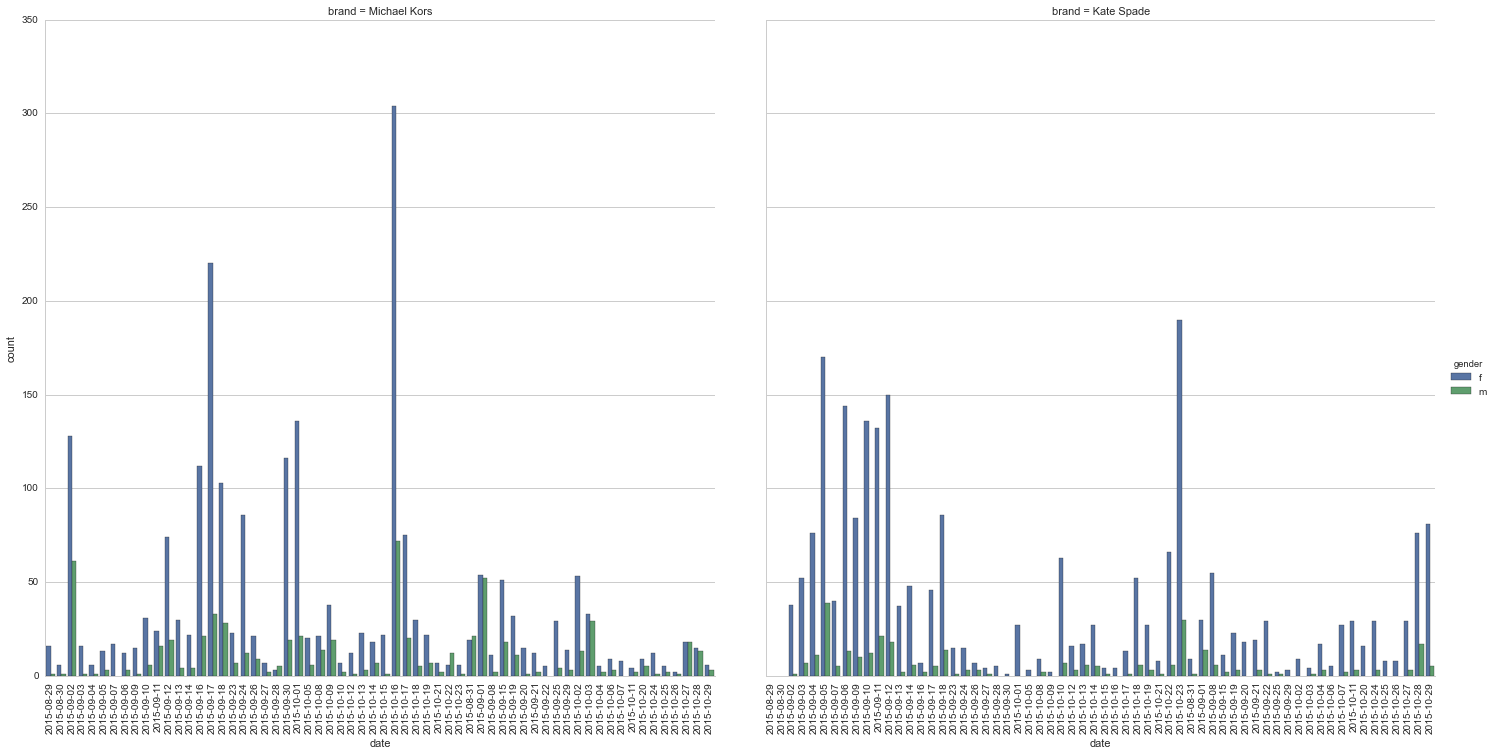

In [30]:
### daily post by gender & brand
g = sns.factorplot(x = 'date', hue = 'gender', col = 'brand', data =df_ts, size = 10, kind = 'count')
g.set_xticklabels(df_ts.date.unique(),rotation = 90)

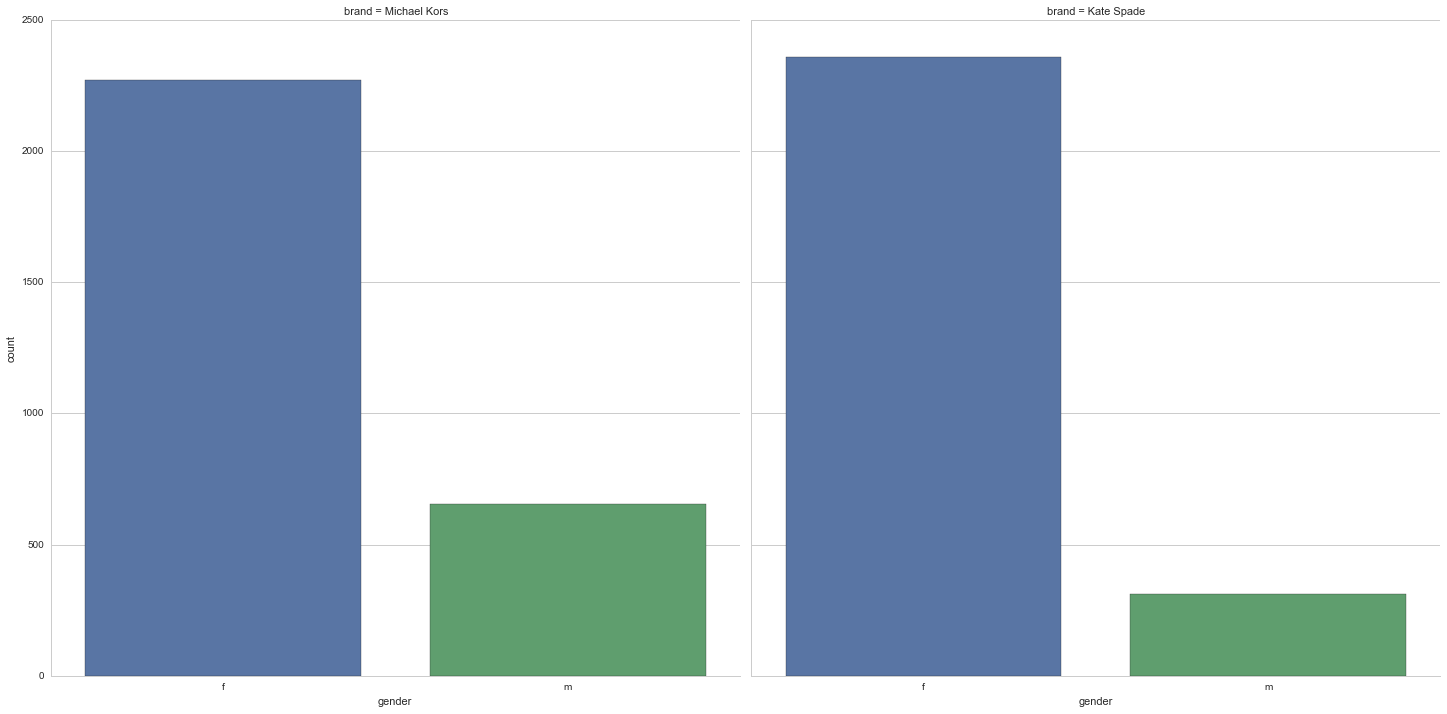

In [31]:
### both brands receive more postings from females
g = sns.factorplot(x = 'gender', col = 'brand', data =df_ts, size = 10, kind = 'count')

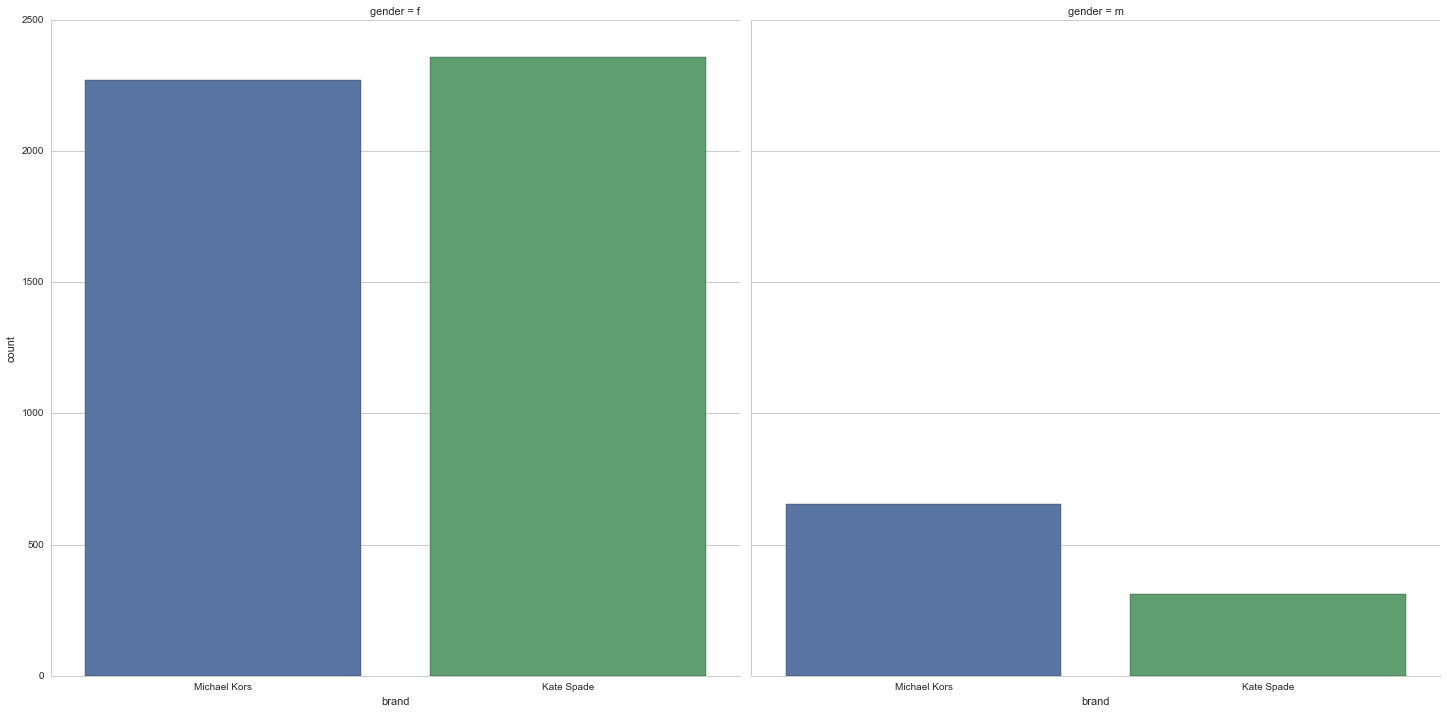

In [32]:
### male users are more likely to post about Michael Kors
g = sns.factorplot(x = 'brand', col = 'gender', data =df_ts, size = 10, kind = 'count')

In [33]:
### Michael Kors related comments and reposts count per day 
gender_count = df_ts_alltype.groupby(['gender','type','brand'])['text'].count()
gender_count

gender  type     brand       
f       comment  Kate Spade        78
                 Michael Kors      89
        repost   Kate Spade      2280
                 Michael Kors    2180
        statuse  Kate Spade      4882
                 Michael Kors    3967
m       comment  Kate Spade        10
                 Michael Kors      18
        repost   Kate Spade       303
                 Michael Kors     638
        statuse  Kate Spade       567
                 Michael Kors     637
Name: text, dtype: int64

In [34]:
### Not all users care about both brands -- a fair comparison should be based on users who posted about both brands

user = df_ts_alltype.groupby(['id','type','brand'])['text'].count()
user.head(10)

id          type     brand       
345872      repost   Kate Spade      1
64679199    statuse  Kate Spade      1
                     Michael Kors    3
1001617114  repost   Michael Kors    1
1002485875  statuse  Kate Spade      1
1002489981  repost   Michael Kors    2
1004465701  repost   Michael Kors    1
1004660240  repost   Michael Kors    1
1004769935  repost   Kate Spade      1
1005018524  statuse  Kate Spade      1
Name: text, dtype: int64

In [35]:
### use the ratio of each users unqiue post on Michael Kors over the number of unqiue post on Kate Spade 
selected_users = pd.merge(df_mk, df_ks, how = 'inner', on = 'id')
(selected_users.groupby('id')['time_x'].nunique()/selected_users.groupby('id')['time_y'].nunique()).nlargest(10)

id
2417793200    70
3764313851    41
5389076341    40
5050308734    31
5631226835    22
2674368443    20
1774848751    17
5151249029    13
5270124462    13
2254793841    11
dtype: float64